## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
#2 Check the shape of the DataFrame (rows, columns)
print(df.shape[0])
print(df.shape[1])

545
13


In [17]:
#3 Look at the data types of the columns
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [5]:
#4 Check for missing  values if any, replace with appropriate values
# Check and fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numerical with median
df.fillna(df.mode().iloc[0], inplace=True)  # Fill categorical with mode

# Verify missing values
print(df.isnull().sum())
df


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
#5 Prepare  X (independent variables) and y (dependent variable)
# Define X (independent variables) and y (dependent variable)
X = df[['area','bedrooms','stories','parking']] # Excluding target variable
y = df['price']  # Target variable

# Check shapes
print(X.shape, y.shape)


(545, 4) (545,)


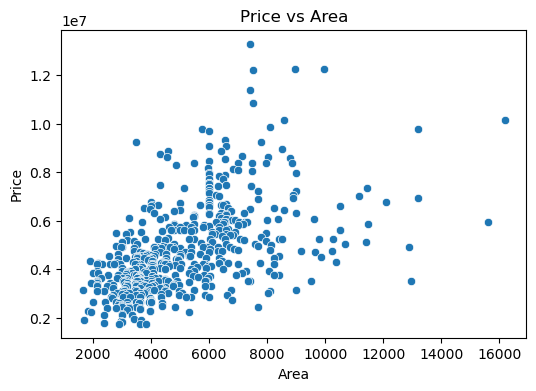

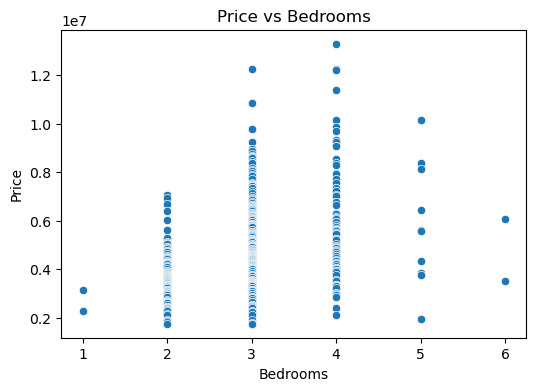

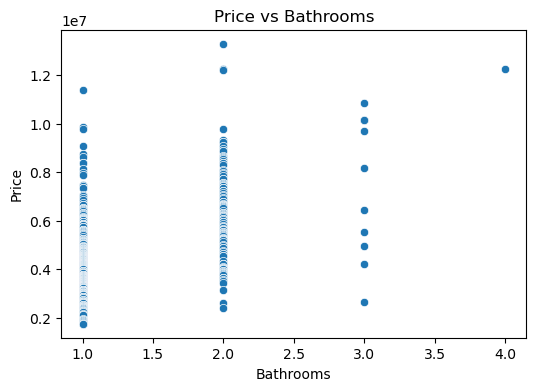

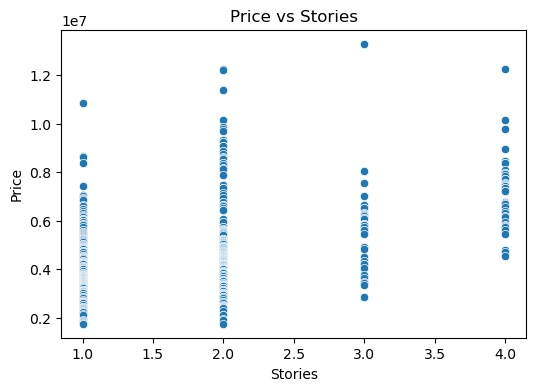

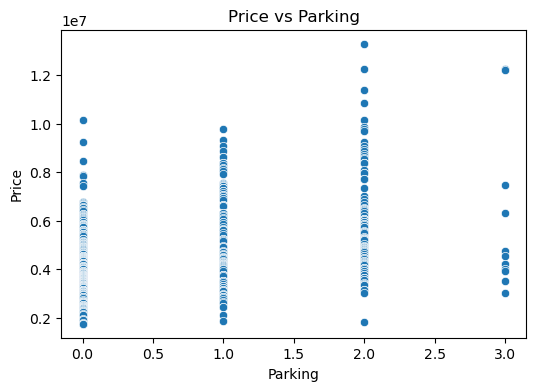

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot for Area vs Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["area"], y=df["price"])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price vs Area")
plt.show()

# Scatterplot for Bedrooms vs Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["bedrooms"], y=df["price"])
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("Price vs Bedrooms")
plt.show()

# Scatterplot for Bathrooms vs Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["bathrooms"], y=df["price"])
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.title("Price vs Bathrooms")
plt.show()

# Scatterplot for Stories vs Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["stories"], y=df["price"])
plt.xlabel("Stories")
plt.ylabel("Price")
plt.title("Price vs Stories")
plt.show()

# Scatterplot for Parking vs Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["parking"], y=df["price"])
plt.xlabel("Parking")
plt.ylabel("Price")
plt.title("Price vs Parking")
plt.show()


In [13]:
#7 Encoding categorical data in X
# Encode categorical columns using one-hot encoding
pd.get_dummies(X, drop_first=True)




,area,bedrooms,stories,parking
0,7420,4,3,2
1,8960,4,4,3
2,9960,3,2,2
3,7500,4,2,3
4,7420,4,2,2
...,...,...,...,...
540,3000,2,1,2
541,2400,3,1,0
542,3620,2,1,0
543,2910,3,1,0


In [14]:
#8  Avoiding the Dummy Variable Trap
# Apply One-Hot Encoding and avoid dummy variable trap
X = pd.get_dummies(X, drop_first=True)

# Check the transformed data
print(X.head())


   area  bedrooms  stories  parking
0  7420         4        3        2
1  8960         4        4        3
2  9960         3        2        2
3  7500         4        2        3
4  7420         4        2        2


In [16]:
#9 Apply feature scaling on numerical variables





# Identify numerical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Apply StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Check transformed data
print(X.head())


NameError: name 'StandardScaler' is not defined

In [17]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the resulting sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(381, 4) (164, 4) (381,) (164,)


In [18]:
#11 Fitting Multiple Linear Regression to the Training 



# Create a Linear Regression model
model = LinearRegression()

# Train (fit) the model using the training data
model.fit(X_train, y_train)
 
# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


NameError: name 'LinearRegression' is not defined

In [20]:
#12 Predict on the train set and calculate the error = y_pred - y_train




# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate the error
train_error = y_train_pred - y_train

# Display the first few errors
print(train_error.head())


NameError: name 'model' is not defined

In [19]:
#13  Residual plot - plot y_pred in x axis and errors in y axis



import matplotlib.pyplot as plt


# Calculate errors (residuals)
residuals = y_train_pred - y_train

# Create residual plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at zero
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (y_pred - y_train)")
plt.title("Residual Plot")
plt.show()


NameError: name 'y_train_pred' is not defined

In [52]:
#14  Predic on the test set



# Predict on the test set
y_test_pred = model.predict(X_test)

# Display the first few predictions
print(y_test_pred[:5])


[5372312.61614641 7069241.00525806 3099290.78784024 4526446.61703974
 3281573.61192656]


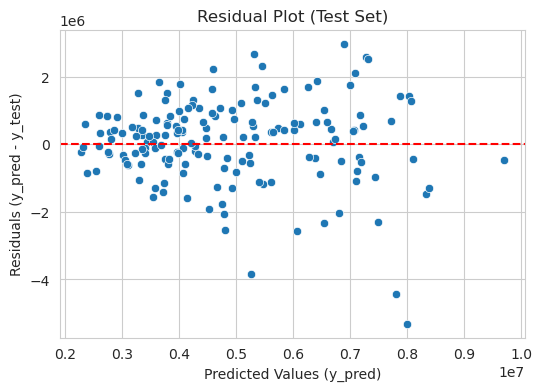

In [53]:
#15 Residual plot - plot y_pred in x axis and errors in y axis



import matplotlib.pyplot as plt

# Calculate errors (residuals)
test_residuals = y_test_pred - y_test

# Create residual plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_pred, y=test_residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at zero
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (y_pred - y_test)")
plt.title("Residual Plot (Test Set)")
plt.show()


In [21]:
#16 Print Mean Squared Error and R Squared Value



from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_test_pred))
print("R²:", r2_score(y_test, y_test_pred))


NameError: name 'y_test_pred' is not defined

In [72]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)


from sklearn.metrics import r2_score

# Calculate R² (if not already calculated)
r2 = r2_score(y_test, y_test_pred)

# Number of observations and features
n = X_test.shape[0]  # Total test samples
k = X_test.shape[1]  # Number of selected independent variables

# Calculate Adjusted R²
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Print Adjusted R²
print("R-Squared (R²):", r2)
print("Adjusted R-Squared:", adjusted_r2)


R-Squared (R²): 0.6463350878895877
Adjusted R-Squared: 0.637437857396244
